In [1]:
import os
import re
import subprocess
import numpy as np
import networkx as nx
import nestedness
import matplotlib.pyplot as plt
from scipy import sparse, stats

input_path = os.path.abspath('input')
bin_path = os.path.abspath('bin')
output_path = os.path.abspath('output')
env = os.environ.copy()
env['PATH'] = '.:' + env['PATH']

# Individual nestedness contribution
## Replication of Figure 1 in [[Saavedra2011]](https://doi.org/10.1038/nature10433).

In [4]:
c = []
for filename in os.listdir(input_path):
    if (re.match('^.*\.txt$', filename, re.IGNORECASE)):
        with open(os.path.join(input_path, filename), 'rb') as adj_matrix:
            A = np.loadtxt(adj_matrix)

        network = nx.bipartite.from_biadjacency_matrix(sparse.csr_matrix(A))
        if len(network) > 205:
            continue
        print(filename)
        try:
            N = nestedness.NODF(network)
        except ValueError:
            continue
        for node in network:
            N_mean, N_std = nestedness.null_model(network, node, 1000)
            c.append((N-N_mean)/N_std)
        #np.savetxt('c.txt', c)

pollinators (1).txt
pollinators (10).txt
pollinators (11).txt
pollinators (13).txt
pollinators (14).txt
pollinators (15).txt
pollinators (16).txt
pollinators (17).txt
pollinators (18).txt
pollinators (19).txt
pollinators (2).txt
pollinators (20).txt
pollinators (21).txt
pollinators (22).txt
pollinators (23).txt
pollinators (24).txt
pollinators (25).txt
pollinators (26).txt
pollinators (27).txt
pollinators (29).txt
pollinators (3).txt
pollinators (30).txt
pollinators (31).txt
pollinators (33).txt
pollinators (34).txt
pollinators (35).txt
pollinators (4).txt
pollinators (5).txt
pollinators (6).txt
pollinators (7).txt
pollinators (8).txt
pollinators (9).txt


In [5]:
print(max(c))
print(min(c))
print(len(c))

5.666970819827743
-7.580728830950167
2863


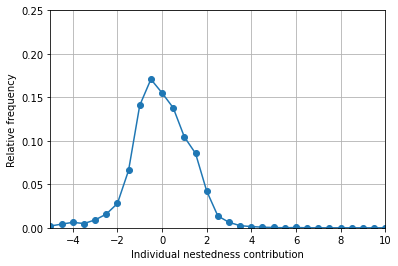

In [12]:
res = stats.relfreq(c, numbins=31, defaultreallimits=(-5, 10))
x = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size, res.frequency.size)
plt.plot(x, res.frequency, marker='o')
plt.xlabel('Individual nestedness contribution')
plt.ylabel('Relative frequency')
plt.xlim((x.min(), x.max()))
plt.ylim((.0, .25))
plt.grid(True)
plt.show()

# NODF calculation
## Replication of values of NODF calculated by [nullnest](https://github.com/cclaualc/nullnest) [[Payrato2019]](https://doi.org/10.1103/PhysRevX.9.031024).

In [2]:
for filename in os.listdir(input_path):
    if (re.match('^.*\.txt$', filename, re.IGNORECASE)):
        with open(os.path.join(input_path, filename), 'rb') as adj_matrix:
            A = np.loadtxt(adj_matrix)

        network = nx.bipartite.from_biadjacency_matrix(sparse.csr_matrix(A))
        try:
            N = nestedness.NODF(network)
        except ValueError:
            continue
        print(f'{filename}...', end=' ')
        sorted_rows = sorted([node for node, data in network.nodes(
            data=True) if data["bipartite"] == 0], key=network.degree, reverse=True)
        sorted_cols = sorted([node for node, data in network.nodes(
            data=True) if data["bipartite"] == 1], key=network.degree, reverse=True)
        A = nx.bipartite.biadjacency_matrix(
            network, row_order=sorted_rows, column_order=sorted_cols).toarray()

        np.savetxt(os.path.join(bin_path, 'matrix0ord.txt'), A, fmt='%d')
        np.savetxt(os.path.join(bin_path, 'matrix0rand.txt'),
                   np.ones_like(A), fmt='%f')
        np.savetxt(os.path.join(bin_path, 'general0.txt'), A.shape, fmt='%d')
        subprocess.run('NODF_analytic 0', cwd=bin_path, shell=True, env=env)

        with open(os.path.join(bin_path, 'analytic_NODF.txt'), 'r') as results:
            line = results.readline().split()
            i = line.index('NODF=')
            actual_N = float(line[i+1])

        if not np.isclose(N, actual_N):
            raise RuntimeError(f'expected {actual_N} but got {N}')
        print('pass')
try:
    os.remove(os.path.join(bin_path, 'matrix0ord.txt'))
    os.remove(os.path.join(bin_path, 'matrix0rand.txt'))
    os.remove(os.path.join(bin_path, 'general0.txt'))
    os.remove(os.path.join(bin_path, 'analytic_NODF.txt'))
except FileNotFoundError:
    pass

print('Validation completed!')

pollinators (1).txt... pass
pollinators (10).txt... pass
pollinators (11).txt... pass
pollinators (12).txt... pass
pollinators (13).txt... pass
pollinators (14).txt... pass
pollinators (15).txt... pass
pollinators (16).txt... pass
pollinators (17).txt... pass
pollinators (18).txt... pass
pollinators (19).txt... pass
pollinators (2).txt... pass
pollinators (20).txt... pass
pollinators (21).txt... pass
pollinators (22).txt... pass
pollinators (23).txt... pass
pollinators (24).txt... pass
pollinators (25).txt... pass
pollinators (26).txt... pass
pollinators (27).txt... pass
pollinators (28).txt... pass
pollinators (29).txt... pass
pollinators (3).txt... pass
pollinators (31).txt... pass
pollinators (32).txt... pass
pollinators (33).txt... pass
pollinators (34).txt... pass
pollinators (4).txt... pass
pollinators (5).txt... pass
pollinators (6).txt... pass
pollinators (7).txt... pass
pollinators (8).txt... pass
pollinators (9).txt... pass
Validation completed!
